<a href="https://colab.research.google.com/github/christophermalone/DSCI325/blob/main/Module2_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2 | Part 3: Pre-Processing Multiple Data Files

This notebook will discuss processes for the pre-processing of multiple data files.  BASH is a language that can be used to process a collection or series of commands that can be used for processing multiple data files.  The collection of commands are often referred to as a (shell) script. 

BASH Wiki Page: https://en.wikipedia.org/wiki/Bash_(Unix_shell) 

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

### Example 2.3.1
For this example, data from a well established bike rental company in New York City will be used.  The goal of this investigation is to compare the number of bike rentals near Central Park for tourists on summer holidays (Memorial Day, Independence Day, and Labor Day) over the last three years (2019/2020/2021).

*   Only <strong>Customers</strong>, i.e. tourists, should be used in this investigation.
*   Only rentals from bike stations near <strong>Central Park</strong> should be used in this investigation, i.e. bike rentals whose station name includes the words Central Park



<p align='center'>
<table border='1'>
<tr>
  <td bgcolor='lightgrey' align='center'><font size="2">Holiday</font></td>
 
  <td bgcolor='lightgrey' align='center'><font size="2">2019</font></td>
  <td bgcolor='lightgrey' align='center'><font size="2">2020</font></td>
  <td bgcolor='lightgrey' align='center'><font size="2">2021</font></td>
</tr>
<tr>
  <td align='center'><font size="2">Memorial<br>Day</font></td>

  <td align='center'><font size="2">May 27</font></td>
  <td align='center'><font size="2">May 25</font></td>
  <td align='center'><font size="2">May 31</font></td>
</tr>
<tr>
  <td align='center'><font size="2">Independence<br>Day</font></td>
 
  <td align='center'><font size="2">July 4</font></td>
  <td align='center'><font size="2">July 4</font></td>
   <td align='center'><font size="2">July 4</font></td>
</tr>
<tr>
  <td align='center'><font size="2">Labor<br>Day</font></td>
 
  <td align='center'><font size="2">Sept 2</font></td>
  <td align='center'><font size="2">Sept 7</font></td>
  <td align='center'><font size="2">Sept 6</font></td>
</tr>

</table>
</p>

 
<i>CitiBike Web site</i>: https://www.citibikenyc.com/system-data
<br><i>Data Source</i>: https://s3.amazonaws.com/tripdata/index.html 

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

A graph analogous to the one shown here is the desired output from this investigation.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1tqb7um1SF7maIrBwp5ybMTMilwDwI4rw"></p>

## Pre-Processing with BASH - Downloading Files

BASH can be used to run a set of commands for the processing of data.  The series of commands are placed into a script or shell script.  The following code will create a file called Download_CitiBikeData.sh.  Each command here uses the wget function to download files from the internet.  The echo command simply instructs BASH to write the contents contained within quoted string to the file being created.  Notice that this series of commands are bracketed with the {} so that all echo lines are written to file.

In [1]:
#Create a file that contains a set of commands to download file
%%bash
{  
 echo 'wget -O  /content/sample_data/May2019.zip https://s3.amazonaws.com/tripdata/201905-citibike-tripdata.csv.zip'
 echo 'wget -O  /content/sample_data/July2019.zip https://s3.amazonaws.com/tripdata/201907-citibike-tripdata.csv.zip'
 echo 'wget -O /content/sample_data/September2019.zip https://s3.amazonaws.com/tripdata/201909-citibike-tripdata.csv.zip'
 echo 'wget -O  /content/sample_data/May2020.zip https://s3.amazonaws.com/tripdata/202005-citibike-tripdata.csv.zip'
 echo 'wget -O  /content/sample_data/July2020.zip https://s3.amazonaws.com/tripdata/202007-citibike-tripdata.csv.zip'
 echo 'wget -O /content/sample_data/September2020.zip https://s3.amazonaws.com/tripdata/202009-citibike-tripdata.csv.zip'
 echo 'wget -O  /content/sample_data/May2021.zip https://s3.amazonaws.com/tripdata/202105-citibike-tripdata.csv.zip'
 echo 'wget -O  /content/sample_data/July2021.zip https://s3.amazonaws.com/tripdata/202107-citibike-tripdata.csv.zip'
 echo 'wget -O /content/sample_data/September2021.zip https://s3.amazonaws.com/tripdata/202109-citibike-tripdata.csv.zip'
 } > Download_CitiBikeData.sh

Next, verify that the contents of the file is correct.

In [2]:
!head -n 10 /content/Download_CitiBikeData.sh

wget -O  /content/sample_data/May2019.zip https://s3.amazonaws.com/tripdata/201905-citibike-tripdata.csv.zip
wget -O  /content/sample_data/July2019.zip https://s3.amazonaws.com/tripdata/201907-citibike-tripdata.csv.zip
wget -O /content/sample_data/September2019.zip https://s3.amazonaws.com/tripdata/201909-citibike-tripdata.csv.zip
wget -O  /content/sample_data/May2020.zip https://s3.amazonaws.com/tripdata/202005-citibike-tripdata.csv.zip
wget -O  /content/sample_data/July2020.zip https://s3.amazonaws.com/tripdata/202007-citibike-tripdata.csv.zip
wget -O /content/sample_data/September2020.zip https://s3.amazonaws.com/tripdata/202009-citibike-tripdata.csv.zip
wget -O  /content/sample_data/May2021.zip https://s3.amazonaws.com/tripdata/202105-citibike-tripdata.csv.zip
wget -O  /content/sample_data/July2021.zip https://s3.amazonaws.com/tripdata/202107-citibike-tripdata.csv.zip
wget -O /content/sample_data/September2021.zip https://s3.amazonaws.com/tripdata/202109-citibike-tripdata.csv.zip


In [3]:
#Verify that the file exists in the /content/ folder!ls /content/
!ls /content/

Download_CitiBikeData.sh  sample_data


The following code block will run (or execute) the lines of code within the script file.   

In [4]:
%%bash
bash Download_CitiBikeData.sh

--2022-02-01 19:08:33--  https://s3.amazonaws.com/tripdata/201905-citibike-tripdata.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.46.254
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.46.254|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82176801 (78M) [application/zip]
Saving to: ‘/content/sample_data/May2019.zip’

     0K .......... .......... .......... .......... ..........  0% 1.24M 63s
    50K .......... .......... .......... .......... ..........  0% 2.39M 48s
   100K .......... .......... .......... .......... ..........  0% 2.40M 43s
   150K .......... .......... .......... .......... ..........  0% 82.1M 32s
   200K .......... .......... .......... .......... ..........  0%  168M 26s
   250K .......... .......... .......... .......... ..........  0% 2.52M 27s
   300K .......... .......... .......... .......... ..........  0% 66.7M 23s
   350K .......... .......... .......... .......... ..........  0% 69.4M 20s
   400K ...

Again, let us verify that the wget commands within the script file were sucessfully executed.  There should be several *.zip files -- one for each year and summer holiday.

In [7]:
#View the contents in the content folder
!ls /content/sample_data/

July2019.zip  July2021.zip  May2020.zip  September2019.zip  September2021.zip
July2020.zip  May2019.zip   May2021.zip  September2020.zip


## Pre-Processing with BASH - Unzipping Files

The next step in the process is to create another script file that contains the commands needed to unzip each of the downloaded files.  Here, the name of the script file is Unzip_CitiBikeData.sh.

In [8]:
%%bash
{   
 echo 'unzip -o /content/sample_data/May2019.zip -d "/content/sample_data"'
 echo 'unzip -o /content/sample_data/July2019.zip -d "/content/sample_data"'
 echo 'unzip -o /content/sample_data/September2019.zip -d "/content/sample_data"'
 echo 'unzip -o /content/sample_data/May2020.zip -d "/content/sample_data"'
 echo 'unzip -o /content/sample_data/July2020.zip -d "/content/sample_data"'
 echo 'unzip -o /content/sample_data/September2020.zip -d "/content/sample_data"'
 echo 'unzip -o /content/sample_data/May2021.zip -d "/content/sample_data"'
 echo 'unzip -o /content/sample_data/July2021.zip -d "/content/sample_data"'
 echo 'unzip -o /content/sample_data/September2021.zip -d "/content/sample_data"'
 
 } > Unzip_CitiBikeData.sh

Verify that the contents of the Unzip_CitiBikeData shell file is correct.

In [9]:
!head -n 10 /content/Unzip_CitiBikeData.sh

unzip -o /content/sample_data/May2019.zip -d "/content/sample_data"
unzip -o /content/sample_data/July2019.zip -d "/content/sample_data"
unzip -o /content/sample_data/September2019.zip -d "/content/sample_data"
unzip -o /content/sample_data/May2020.zip -d "/content/sample_data"
unzip -o /content/sample_data/July2020.zip -d "/content/sample_data"
unzip -o /content/sample_data/September2020.zip -d "/content/sample_data"
unzip -o /content/sample_data/May2021.zip -d "/content/sample_data"
unzip -o /content/sample_data/July2021.zip -d "/content/sample_data"
unzip -o /content/sample_data/September2021.zip -d "/content/sample_data"


After a script file has been created to unzip each file, execute the lines of code using the following command.

In [10]:
%%bash
bash Unzip_CitiBikeData.sh

Archive:  /content/sample_data/May2019.zip
  inflating: /content/sample_data/201905-citibike-tripdata.csv  
Archive:  /content/sample_data/July2019.zip
  inflating: /content/sample_data/201907-citibike-tripdata.csv  
Archive:  /content/sample_data/September2019.zip
  inflating: /content/sample_data/201909-citibike-tripdata.csv  
Archive:  /content/sample_data/May2020.zip
  inflating: /content/sample_data/202005-citibike-tripdata.csv  
Archive:  /content/sample_data/July2020.zip
  inflating: /content/sample_data/202007-citibike-tripdata.csv  
Archive:  /content/sample_data/September2020.zip
  inflating: /content/sample_data/202009-citibike-tripdata.csv  
Archive:  /content/sample_data/May2021.zip
  inflating: /content/sample_data/202105-citibike-tripdata.csv  
  inflating: /content/sample_data/__MACOSX/._202105-citibike-tripdata.csv  
Archive:  /content/sample_data/July2021.zip
  inflating: /content/sample_data/202107-citibike-tripdata.csv  
  inflating: /content/sample_data/__MACOSX/._

Once again, verify that each has been sucessfully unzipped.

In [11]:
#View the contents in the content folder
!ls -l /content/sample_data/

total 4813264
-rw-r--r-- 1 root root 367008111 Jun 11  2019 201905-citibike-tripdata.csv
-rw-r--r-- 1 root root 415266713 Aug  5  2019 201907-citibike-tripdata.csv
-rw-r--r-- 1 root root 464421401 Oct 11  2019 201909-citibike-tripdata.csv
-rw-r--r-- 1 root root 283682921 Jun  5  2020 202005-citibike-tripdata.csv
-rw-r--r-- 1 root root 399626762 Aug 12  2020 202007-citibike-tripdata.csv
-rw-r--r-- 1 root root 472984200 Oct 13  2020 202009-citibike-tripdata.csv
-rw-r--r-- 1 root root 493561085 Jun 11  2021 202105-citibike-tripdata.csv
-rw-r--r-- 1 root root 577353079 Aug 14 05:53 202107-citibike-tripdata.csv
-rw-r--r-- 1 root root 614905813 Oct  4 16:14 202109-citibike-tripdata.csv
-rw-r--r-- 1 root root  93359147 Aug  5  2019 July2019.zip
-rw-r--r-- 1 root root  94091098 Aug 12  2020 July2020.zip
-rw-r--r-- 1 root root  97344649 Aug 14 06:12 July2021.zip
drwxr-xr-x 2 root root      4096 Feb  1 19:11 __MACOSX
-rw-r--r-- 1 root root  82176801 Jun 11  2019 May2019.zip
-rw-r--r-- 1 root roo

## Pre-Processing of Data Files - GREP

The following command can be used to get the number of lines across all *.csv files.

In [12]:
!awk 'END{ print NR }' /content/sample_data/*.csv

21721382


An alternative to AWK is the use the <strong>!wc</strong> utility function.  The word count function has an -l option (the letter l, not 1) that can be used to count lines in a file.  This alternative is faster than AWK and it provides more details.

In [13]:
!wc -l /content/sample_data/*.csv

   1924564 /content/sample_data/201905-citibike-tripdata.csv
   2181065 /content/sample_data/201907-citibike-tripdata.csv
   2444901 /content/sample_data/201909-citibike-tripdata.csv
   1487891 /content/sample_data/202005-citibike-tripdata.csv
   2105809 /content/sample_data/202007-citibike-tripdata.csv
   2488226 /content/sample_data/202009-citibike-tripdata.csv
   2724166 /content/sample_data/202105-citibike-tripdata.csv
   3084538 /content/sample_data/202107-citibike-tripdata.csv
   3280222 /content/sample_data/202109-citibike-tripdata.csv
  21721382 total


GREP is yet another command-line procedure for searching plain-text in data files that match a partipular expression.  GREP uses regular expression syntax when doing its searching. 

Wiki Entry for GREP: https://en.wikipedia.org/wiki/Grep 

The following <strong>!grep</strong> command will find all rows for which the word Customer is present.  The output from this search will be placed into a file named Customer.csv in the /content/sample_data/ folder.

In [38]:
!grep 'Customer' /content/sample_data/*.csv > /content/sample_data/Customer.csv

Next, count the number of records where the rental was from a Customer.



In [39]:
!wc -l /content/sample_data/Customer.csv

2828190 /content/sample_data/Customer.csv


Next, get all the lines in Customer.csv file that have <strong>Central Park</strong> contained in either in the Start Station or End Station fields.

In [40]:
!grep 'Central Park' /content/sample_data/Customer.csv > /content/sample_data/Customer_CentralPark.csv

A check of the number of records in the Customer_CentralPark.csv file. 

In [41]:
!wc -l /content/sample_data/Customer_CentralPark.csv

246197 /content/sample_data/Customer_CentralPark.csv


The two-step processing done above using !grep can be done with in a single step.  The syntax for the grep command must be modified so that a logicial <strong>AND</strong> is implemented.  This is accomplished through the use of the .* syntax.

In [42]:
#Using the AND syntax with grep
!grep 'Central Park.*Customer' /content/sample_data/*.csv > /content/sample_data/Customer_CentralPark_v2.csv

Verify that the grep functions was successfully executed by retrieving the number of records in this version.

In [43]:
!wc -l /content/sample_data/Customer_CentralPark_v2.csv

738591 /content/sample_data/Customer_CentralPark_v2.csv


<strong>Note</strong>: Notice that this version contains *too many* lines (the number of records do *not* match the grep command that was done above).  This happened because the *.csv wildcard inadvertly included more than just the original data files.  The grep command should only be run on the orginal data files; thus, the wildcard must be modified.

In [44]:
!ls -l /content/sample_data/

total 5735696
-rw-r--r-- 1 root root 367008111 Jun 11  2019 201905-citibike-tripdata.csv
-rw-r--r-- 1 root root 415266713 Aug  5  2019 201907-citibike-tripdata.csv
-rw-r--r-- 1 root root 464421401 Oct 11  2019 201909-citibike-tripdata.csv
-rw-r--r-- 1 root root 283682921 Jun  5  2020 202005-citibike-tripdata.csv
-rw-r--r-- 1 root root 399626762 Aug 12  2020 202007-citibike-tripdata.csv
-rw-r--r-- 1 root root 472984200 Oct 13  2020 202009-citibike-tripdata.csv
-rw-r--r-- 1 root root 493561085 Jun 11  2021 202105-citibike-tripdata.csv
-rw-r--r-- 1 root root 577353079 Aug 14 05:53 202107-citibike-tripdata.csv
-rw-r--r-- 1 root root 614905813 Oct  4 16:14 202109-citibike-tripdata.csv
-rw-r--r-- 1 root root  61577779 Feb  1 19:19 Customer_CentralPark.csv
-rw-r--r-- 1 root root 204429097 Feb  1 19:19 Customer_CentralPark_v2.csv
-rw-r--r-- 1 root root 678553047 Feb  1 19:19 Customer.csv
-rw-r--r-- 1 root root  93359147 Aug  5  2019 July2019.zip
-rw-r--r-- 1 root root  94091098 Aug 12  2020 Ju

The following modification to the wildcard will resolve this issue.

In [45]:
!grep 'Central Park.*Customer' /content/sample_data/*-tripdata.csv > /content/sample_data/Customer_CentralPark_v2.csv

Verify that the contents of this file matches that of what was done in the two-step process of filtering down to Customers and station locations near Central Park.

In [46]:
!wc -l /content/sample_data/Customer_CentralPark_v2.csv

246197 /content/sample_data/Customer_CentralPark_v2.csv


Notice that the files are the same size which may provide evidence that the contents of the two file match.  A more formal method to compare two files is to use the !diff command.

In [47]:
!ls -l /content/sample_data/Customer_CentralPark*

-rw-r--r-- 1 root root 61577779 Feb  1 19:19 /content/sample_data/Customer_CentralPark.csv
-rw-r--r-- 1 root root 61577779 Feb  1 19:20 /content/sample_data/Customer_CentralPark_v2.csv


<table width='100%' ><tr><td bgcolor='orange'></td></tr></table>

### Aside -- Formally comparing two files with !diff

The </strong>!diff</strong> command is a formal method to compare the contents of two different files.  The output returned here is empty, which is good, as this indicates that the two files match exactly.


In [48]:
!diff /content/sample_data/Customer_CentralPark_v2.csv /content/sample_data/Customer_CentralPark.csv

<table width='100%' ><tr><td bgcolor='orange'></td></tr></table>

### Using GREP to Get the Desired Dates


The Customer_CentralPark.csv file contains bike rentals from customers who either initated or returned a bike from a station whose name includes Central Park. 

The next task is to select only the rentals from the desired dates.  The following code will be used to extract the July 04 dates.

In [49]:
!grep '-07-04' /content/sample_data/Customer_CentralPark.csv > /content/sample_data/Customer_CentralPark_Holidays.csv

grep: invalid option -- '-'
Usage: grep [OPTION]... PATTERN [FILE]...
Try 'grep --help' for more information.


The initial dash is causing problems as GREP thinks this is an actual commnand and not the dash character. At times, it is necessary to <strong>escapulate</strong> a character in grep.  This is done using the backslash as is shown below.

In [50]:
!grep '\-07-04' /content/sample_data/Customer_CentralPark.csv > /content/sample_data/Customer_CentralPark_Holidays.csv

Let us check how many rentals we have for the fourth of July across all three years.

In [51]:
!wc -l /content/sample_data/Customer_CentralPark_Holidays.csv

4324 /content/sample_data/Customer_CentralPark_Holidays.csv


Next, the grep command is modified to filter out bike rentals from May 27, 2019.

In [52]:
!grep '2019-05-27' /content/sample_data/Customer_CentralPark.csv > /content/sample_data/Customer_CentralPark_Holidays.csv

Again, a simple count of the records in this file.

In [53]:
!wc -l /content/sample_data/Customer_CentralPark_Holidays.csv

3236 /content/sample_data/Customer_CentralPark_Holidays.csv


A logical <strong>OR</strong> will be needed in order to select more than one date in the search through the data file.  The vertical bar , i.e. | , is used to represent OR in grep.  The following will search the Customer_CentralPark.csv and filter out rentals that occured on July 4th (of any year) OR rentals from May 27, 2019.

In [54]:
!grep -E '\-07-04|2019-05-27' /content/sample_data/Customer_CentralPark.csv > /content/sample_data/Customer_CentralPark_Holidays.csv

Let us verify that the grep command was successful. The <strong>!shuf</strong> command randomly suffles the rows within a file.  The -n 20 options tells shuf to show a random selection of 20 rows.  

In [56]:
!tail -n 20 /content/sample_data/Customer_CentralPark_Holidays.csv 

/content/sample_data/202007-citibike-tripdata.csv:1057,"2020-07-04 23:22:49.3730","2020-07-04 23:40:27.3200",499,"Broadway & W 60 St",40.76915505,-73.98191841,3341,"Central Park West & W 102 St",40.795346,-73.96186,41824,"Customer",1969,0
/content/sample_data/202007-citibike-tripdata.csv:772,"2020-07-04 23:24:57.3930","2020-07-04 23:37:50.0820",3323,"W 106 St & Central Park West",40.7981856,-73.9605909006,3360,"Amsterdam Ave & W 79 St",40.7829391,-73.9786517,25092,"Customer",1987,1
/content/sample_data/202007-citibike-tripdata.csv:963,"2020-07-04 23:25:24.7160","2020-07-04 23:41:28.2130",3165,"Central Park West & W 72 St",40.77579376683666,-73.9762057363987,3534,"Frederick Douglass Blvd & W 117 St",40.805159,-73.954692,25964,"Customer",1988,1
/content/sample_data/202007-citibike-tripdata.csv:2639,"2020-07-04 23:29:24.0810","2020-07-05 00:13:23.3060",3320,"Central Park West & W 100 St",40.79406660818552,-73.96286845207214,3327,"3 Ave & E 100 St",40.7877214,-73.94728331,21497,"Customer",

The following extension of the grep command will be used to get all the bike rentals for each of the summer holidays across the three years.

In [79]:
!grep -E '\-07-04|2019-05-27|2020-05-25|2021-05-31|2019-09-02|2020-09-07|2021-09-06' /content/sample_data/Customer_CentralPark.csv > /content/sample_data/Customer_CentralPark_Holidays.csv

In [58]:
#Verify the nubmer of lines in this file
!wc -l /content/sample_data/Customer_CentralPark_Holidays.csv

13564 /content/sample_data/Customer_CentralPark_Holidays.csv


Again, a random selection of rows to verify condidtions have been meet.  Here 50 rows are being randomly selected from this data file.

In [59]:
!shuf -n 50 /content/sample_data/Customer_CentralPark_Holidays.csv 

/content/sample_data/202009-citibike-tripdata.csv:2153,"2020-09-07 14:38:57.5940","2020-09-07 15:14:51.2710",528,"2 Ave & E 31 St",40.74290902,-73.97706058,2006,"Central Park S & 6 Ave",40.76590936,-73.97634151,37756,"Customer",1969,0
/content/sample_data/202005-citibike-tripdata.csv:1020,"2020-05-25 14:46:29.0970","2020-05-25 15:03:30.0030",3163,"Central Park West & W 68 St",40.7734066,-73.97782542,3534,"Frederick Douglass Blvd & W 117 St",40.805159,-73.954692,34862,"Customer",1994,2
/content/sample_data/201905-citibike-tripdata.csv:3044,"2019-05-27 14:52:53.5180","2019-05-27 15:43:38.0140",281,"Grand Army Plaza & Central Park S",40.7643971,-73.97371465,281,"Grand Army Plaza & Central Park S",40.7643971,-73.97371465,19956,"Customer",2002,1
/content/sample_data/202009-citibike-tripdata.csv:493,"2020-09-07 09:46:20.3590","2020-09-07 09:54:34.0500",3357,"W 106 St & Amsterdam Ave",40.8008363,-73.9664492472,4122,"Central Park W & W 97 St",40.79249519495111,-73.96417066463071,34190,"Custome

### Getting a Header

Even though the original data files have a row that contains the field names, this informaiton was lost through the use of the grep command.  There are two options regarding adding a header.


1.   Use SED and create a header from scratch, or
2.   Steal the header from one of the original data files

Option #2 will be used here.  The following command takes the 1st line from one of the original data files and puts these variable names into a filed named Header.csv.


In [61]:
!head -n 1 /content/sample_data/201905-citibike-tripdata.csv > /content/sample_data/Header.csv

Next, verify tha the header has been successfully save into this file.

In [62]:
!cat /content/sample_data/Header.csv 

"tripduration","starttime","stoptime","start station id","start station name","start station latitude","start station longitude","end station id","end station name","end station latitude","end station longitude","bikeid","usertype","birth year","gender"


R does not play well with spaces in the variable names. Thus, let's use SED to replace all spaces in field names with an underscore.  The -i option indicates that in-place editing will be used, i.e. the contents will be saved into the current file. 

In [63]:
!sed -i '1s/ /_/g' /content/sample_data/Header.csv 

Verify that the sed command above successfully replaced the spaces with an underscore character.

In [64]:
!cat /content/sample_data/Header.csv 

"tripduration","starttime","stoptime","start_station_id","start_station_name","start_station_latitude","start_station_longitude","end_station_id","end_station_name","end_station_latitude","end_station_longitude","bikeid","usertype","birth_year","gender"


The <strong>!cat</strong> command allows the contents of two or more files to be appended together.  The first file is placed at the top, the next file is appended below the first, etc.  Here, the header should be placed at the top, followed by the contents of the data file. 

In [65]:
!cat /content/sample_data/Header.csv /content/sample_data/Customer_CentralPark_Holidays.csv > /content/sample_data/Customer_CentralPark_Holidays_withHeader.csv 

Use head to make sure the two files were properly appended together. 

In [66]:
!head /content/sample_data/Customer_CentralPark_Holidays_withHeader.csv

"tripduration","starttime","stoptime","start_station_id","start_station_name","start_station_latitude","start_station_longitude","end_station_id","end_station_name","end_station_latitude","end_station_longitude","bikeid","usertype","birth_year","gender"
/content/sample_data/201905-citibike-tripdata.csv:151658,"2019-05-25 23:29:33.0260","2019-05-27 17:37:11.7740",3724,"7 Ave & Central Park South",40.7667405590595,-73.9790689945221,3258,"W 27 St & 10 Ave",40.75018156325683,-74.00218427181244,26539,"Customer",1969,0
/content/sample_data/201905-citibike-tripdata.csv:57294,"2019-05-26 21:27:21.2430","2019-05-27 13:22:15.6110",3320,"Central Park West & W 100 St",40.79406660818552,-73.96286845207214,499,"Broadway & W 60 St",40.76915505,-73.98191841,17009,"Customer",1969,0
/content/sample_data/201905-citibike-tripdata.csv:848,"2019-05-26 23:49:43.1070","2019-05-27 00:03:51.5060",486,"Broadway & W 29 St",40.7462009,-73.98855723,2006,"Central Park S & 6 Ave",40.76590936,-73.97634151,14718,"Custo

## Reading data into R

This is a iPython Notebook; thus, set up R Magic so that R can be run in subsequent code blocks.

In [67]:
%load_ext rpy2.ipython

The tidyverse package will be used for the managment of the data.frame and plotting in R.

In [68]:
%%R
library(tidyverse)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [69]:
#Read the *.csv file into R; provide names for each field as well
%%R

NYC_Holidays_CitiBikeRentals <- read_csv('/content/sample_data/Customer_CentralPark_Holidays_withHeader.csv')

Rows: 13564 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): tripduration, start_station_name, end_station_name, usertype
dbl  (9): start_station_id, start_station_latitude, start_station_longitude,...
dttm (2): starttime, stoptime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Next, consider the structure of the data.frame read in by the read_csv() function from the tidyverse package in R.  Note that the startime and stoptime are designated as date fields (not strings).  The POSIXct is a special specification for dates.  R (and other software packages) will take advantage of this structure when manipulating date fields. 

In [70]:
%%R
str(NYC_Holidays_CitiBikeRentals)

spec_tbl_df [13,564 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ tripduration           : chr [1:13564] "/content/sample_data/201905-citibike-tripdata.csv:151658" "/content/sample_data/201905-citibike-tripdata.csv:57294" "/content/sample_data/201905-citibike-tripdata.csv:848" "/content/sample_data/201905-citibike-tripdata.csv:1096" ...
 $ starttime              : POSIXct[1:13564], format: "2019-05-25 23:29:33" "2019-05-26 21:27:21" ...
 $ stoptime               : POSIXct[1:13564], format: "2019-05-27 17:37:11" "2019-05-27 13:22:15" ...
 $ start_station_id       : num [1:13564] 3724 3320 486 3165 447 ...
 $ start_station_name     : chr [1:13564] "7 Ave & Central Park South" "Central Park West & W 100 St" "Broadway & W 29 St" "Central Park West & W 72 St" ...
 $ start_station_latitude : num [1:13564] 40.8 40.8 40.7 40.8 40.8 ...
 $ start_station_longitude: num [1:13564] -74 -74 -74 -74 -74 ...
 $ end_station_id         : num [1:13564] 3258 499 2006 281 3323 ...
 $ end_station_name   

Consider the use of the <strong>format()</strong> function in R.  The following can be used to obtain the Year and Month from the startime field in R.  The output returned from the format() function are placed into new fields in the NYC_Holidays_CitiBikeRentals data.frame.

In [71]:
%%R

NYC_Holidays_CitiBikeRentals$Year <- format(NYC_Holidays_CitiBikeRentals$starttime, format="%Y")
NYC_Holidays_CitiBikeRentals$Month <- format(NYC_Holidays_CitiBikeRentals$starttime, format="%m")

cat("\n")
cat("\n")
cat("Notice the addition of the two new fields in this data.frame, i.e. Year and Month\n\n")
str(NYC_Holidays_CitiBikeRentals)



Notice the addition of the two new fields in this data.frame, i.e. Year and Month

spec_tbl_df [13,564 × 17] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ tripduration           : chr [1:13564] "/content/sample_data/201905-citibike-tripdata.csv:151658" "/content/sample_data/201905-citibike-tripdata.csv:57294" "/content/sample_data/201905-citibike-tripdata.csv:848" "/content/sample_data/201905-citibike-tripdata.csv:1096" ...
 $ starttime              : POSIXct[1:13564], format: "2019-05-25 23:29:33" "2019-05-26 21:27:21" ...
 $ stoptime               : POSIXct[1:13564], format: "2019-05-27 17:37:11" "2019-05-27 13:22:15" ...
 $ start_station_id       : num [1:13564] 3724 3320 486 3165 447 ...
 $ start_station_name     : chr [1:13564] "7 Ave & Central Park South" "Central Park West & W 100 St" "Broadway & W 29 St" "Central Park West & W 72 St" ...
 $ start_station_latitude : num [1:13564] 40.8 40.8 40.7 40.8 40.8 ...
 $ start_station_longitude: num [1:13564] -74 -74 -74 -74 -74 ...
 $ end

Let us review the contents of columns 2 and 13 through 17 for the first few rows of the resulting data.frame.

In [73]:
#The followoing variation of the head command can be used to show only specific columns of a data.frame.
%%R

head(NYC_Holidays_CitiBikeRentals[,c(2,13:17)])

# A tibble: 6 × 6
  starttime           usertype birth_year gender Year  Month
  <dttm>              <chr>         <dbl>  <dbl> <chr> <chr>
1 2019-05-25 23:29:33 Customer       1969      0 2019  05   
2 2019-05-26 21:27:21 Customer       1969      0 2019  05   
3 2019-05-26 23:49:43 Customer       1969      0 2019  05   
4 2019-05-27 00:00:47 Customer       1996      1 2019  05   
5 2019-05-27 00:13:13 Customer       1969      0 2019  05   
6 2019-05-27 00:47:54 Customer       1969      0 2019  05   


<strong>Questions</strong>:  

1. Consider the use of the format() function above, change the %Y to %y.  How does this influence the output returned by this function?  Discuss.
2. Again, consider the use of the format() function above, change the %M to %m.  How does thsi influence the output returned by this function?  Discuss.

## Getting the Necessary Counts

The following sequnce of R commands will compute a count for each summer holiday for each of the three years.  Make note of the bracketing, i.e. (), which is anologous to the bracketing used in the BASH code above. 

In [76]:
%%R

( NYC_Holidays_CitiBikeRentals
  %>% group_by(Year, Month)
  %>% summarise(Count = n())
) -> NYC_Holidays_CitiBikeRentals_Counts

`summarise()` has grouped output by 'Year'. You can override using the `.groups` argument.


Taking a look at the contents of the resulting data.frame from the sequence of dplyr commands above.

In [77]:
%%R
NYC_Holidays_CitiBikeRentals_Counts

# A tibble: 6 × 3
# Groups:   Year [2]
  Year  Month Count
  <chr> <chr> <int>
1 2019  05     3236
2 2019  07     2220
3 2019  09      970
4 2020  05     2472
5 2020  07     2104
6 2020  09     2562


## Creating the Graph

The <strong>ggplot()</strong> function in R is the most common plotting routine currently being implemented in R.  The following ggplot() code will be used to create a side-by-side bar graph of the counts.

<strong>Note</strong>: The "+" symbol is the pipping character in ggplot and is used to chain commands together.  The piping character in ggplot must be placed at the end of the line.

The following code accomplishes the following:


1.   Line 3 specifies that the data from the NYC_Holidays_CitiBikeRentals_Counts data.frame should be used for plotting
2.   Line 4 provides the specifications for the plot, e.g. what is the x-axis, y-axis, etc.
3.  Line 5 specifies that a columns are to be used; the 'dodge' indicates that a side-by-side column graph should constructed
4.  The last specifes that type of theme to be used



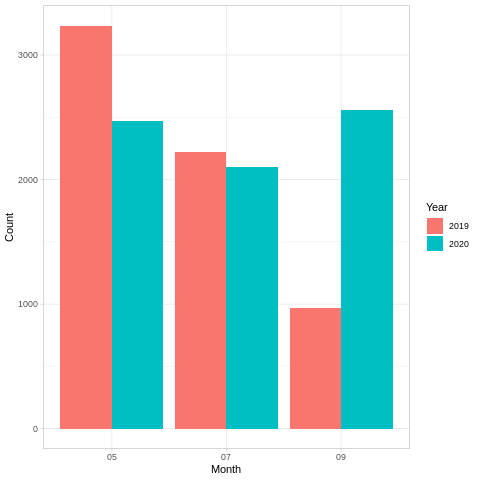

In [78]:
%%R

NYC_Holidays_CitiBikeRentals_Counts %>%
 ggplot(aes(x = Month, y = Count, fill=Year)) + 
  geom_col(position='dodge') +
  theme_light()  #the theme_light simply reduces the default background created by ggplot

The following use of the mutate() function allows for the recoding of months into the actual names of the Holidays.

In [80]:
%%R
(
NYC_Holidays_CitiBikeRentals_Counts
 %>% mutate(Holiday = case_when(Month == "05" ~ "Memorial Day", Month == "07" ~ "Independence Day", Month == "09" ~ "Labor Day"))
) -> NYC_Holidays_CitiBikeRentals_Counts

head(NYC_Holidays_CitiBikeRentals_Counts)

# A tibble: 6 × 4
# Groups:   Year [2]
  Year  Month Count Holiday         
  <chr> <chr> <int> <chr>           
1 2019  05     3236 Memorial Day    
2 2019  07     2220 Independence Day
3 2019  09      970 Labor Day       
4 2020  05     2472 Memorial Day    
5 2020  07     2104 Independence Day
6 2020  09     2562 Labor Day       


Here, the side-by-side column graph is recreating using the Holiday variable instead of months.

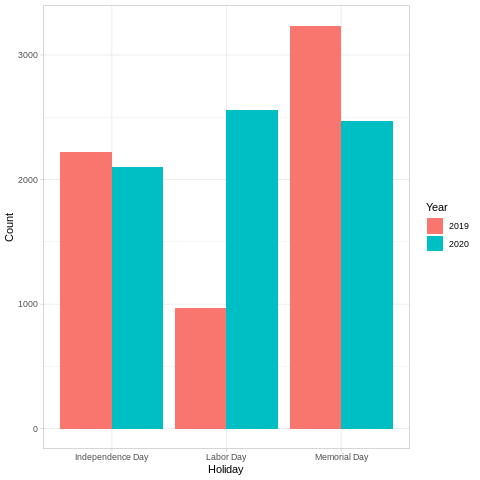

In [81]:
%%R

NYC_Holidays_CitiBikeRentals_Counts %>%
 ggplot(aes(x = Holiday, y = Count, fill=Year)) +
  geom_col(position='dodge') +
  theme_light()  
  

Conider the addition of Line 4.  The fct_relevel() function allows the factor levels of Holiday to be arranaged in a particular order.  Notice above, the order in which the factor levels were plotted was alphabetical.  

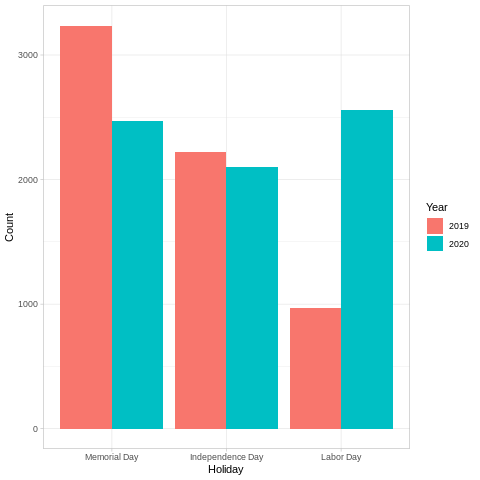

In [82]:
%%R

NYC_Holidays_CitiBikeRentals_Counts %>%
 mutate(Holiday = fct_relevel(Holiday, c("Memorial Day","Independence Day","Labor Day"))) %>%
 ggplot(aes(x = Holiday, y = Count, fill=Year)) +
  geom_col(position='dodge') +
  theme_light() 
  

The following code includes several additional specifications for the side-by-side column graph created by ggplot().

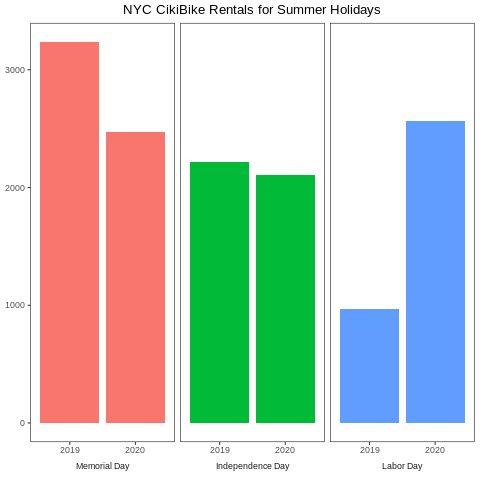

In [83]:
%%R

NYC_Holidays_CitiBikeRentals_Counts %>%
  mutate(Holiday = fct_relevel(Holiday, c("Memorial Day","Independence Day","Labor Day"))) %>%
  ggplot(aes(x = Year, y = Count,fill=Month)) +
    geom_col(position='dodge')  +
    facet_grid(~Holiday,         # Makes panels for the Holidays
             switch = "x") +     # Puts the panel labels on the x-axis                         
    ggtitle("NYC CikiBike Rentals for Summer Holidays") +  #Give the plot a title
    theme(legend.position = "none",           # Do not print a legend for the plot
          panel.background = element_blank(),   # Remove the background in the panels
          panel.border = element_rect(color="black",fill=NA),  # Put the borders back on the panels 
          strip.placement = "outside",                       # Place facet labels outside x axis labels
          strip.background = element_rect(fill = "white"),   # Make the background for facet labels white
          axis.title = element_blank(),                      # Do not include the labels on the axes
          plot.title = element_text(hjust = 0.5)             # Center the ggplot title
          ) 


## Task: Answer the following questions

1. How do the bike rentals for 2020 compare to previous years? Discuss.
2. Consider the following additions to the specifications with the theme() function.  Briefly explain the effect of these specfications on the plot returned.
<ul>
  <li>panel.spacing.x = unit(2,"lines)</li>
  <li>panel.grid.major.y = element_line("lightgray",0.5)</li>
</ul>
<ul>
Add these specifications within the theme() function below.  Make sure to add commas to the end of each line so separate the parameters in the theme() function -- except for the last line.
</ul>

3.  Certainly weather events are likely to impact the nubmer of bike rentals on any particular day.  Past weather information for a day/location can be obtained at Weather Underground.  Consider the weather for Labor Day 2019.  How might the weather on this day in New York City negatively impact the number of bike rentals.  Discuss. 

 Weather Underground Link:  <a href="https://www.wunderground.com/history/daily/us/ny/new-york-city/KLGA/date/2019-9-2">https://www.wunderground.com/history/daily/us/ny/new-york-city/KLGA/date/2019-9-2</a>
</ul>
